# Análise exploratória de combustíveis - Dados para abastecer o carro!

---

## **1. Entendendo a Proposta:** 

Nossa equipe foi escalada pela Agência Nacional de Petróleo e Gás Natural e
Biocombustíveis ([ANP](https://www.gov.br/anp/pt-br)) para realizar uma análise exploratória relacionada à série
histórica de preço de venda da gasolina e do etanol.

Nesta etapa será análisada os objetivos da análise, buscando conhecer mais o nosso contratante e o que foi solicitado.

**1.1. Conhecendo a ANP.**


A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis ([ANP](https://www.gov.br/anp/pt-br)) é o órgão regulador das atividades que integram as indústrias de petróleo e gás natural e de biocombustíveis no Brasil, é responsável pelas regras e resoluções de exploração, produção, refino, comercialização e transporte do petróleo e seus derivados no Brasil. Além disso, é vinculada ao Ministério de Minas e Energia e, também, mantém o Banco de Dados de Exploração e Produção (BDEP), no qual são publicados dados sobre a indústrias do petróleo, biocombustível e gás natural, como a produção nacional e o preço média de venda de combustível semanalmente.


<center><img alt="ANP" width="30%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Anp-logo-3.png/800px-Anp-logo-3.png"></center>

**1.2. Perguntas a serem respondidas:**

1. Como se comportaram o preço dos combustíveis durante os dois meses citados?Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?

2. Qual o preço médio da gasolina e do etanol nesses dois meses?

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4. Qual o preço médio da gasolina e do etanol por estado?

5. Qual o município que possui o menor preço para a gasolina e para o etanol?

6. Qual o município que possui o maior preço para a gasolina e para o etanol?

7. Qual a região que possui o maior valor médio da gasolina?

8. Qual a região que possui o menor valor médio do etanol?

9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

## **2. Entendendo os Dados:**

Nesta etapa estaremos coletando e conhecendo os dados iniciais, explorando-os e verificando sua qualidade.


 <font size="4"> **2.1.Realizando a coleta dos dados.** </font> ​

Por meio do portal [gov.br](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022?b_start:int=0), foi possível baixar os dados necessários para a realização do projeto.

Dessa forma, foram selecionados dois arquivos referentes ao preço histórico da gasolina e do etanol, um do mês de Julho e outro do mês de Agosto:

 <font size="4"> **2.2.Preparando ambiente.** </font>

Foi feita a importação das bibliotecas necessárias para conclusão do projeto.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Em seguida, foram importados os dados necessários por meio de funções, adicionando duas possibilidades de importação, evitando a chance de erro.

* <font size="4"> Importando dados de **julho** de 2022:

In [3]:
def julhoCsv():
        try:
          url_julho = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv'
          dados_brutos_julho = pd.read_csv(url_julho, sep=';')
          return dados_brutos_julho

        except:
          url_julho = 'https://raw.githubusercontent.com/lucasCanella/Projeto-modulo-4/colab1/dados/dados_originais/precos-gasolina-etanol-julho.csv'
          dados_brutos_julho = pd.read_csv(url_julho, sep=';')
          return dados_brutos_julho

dados_brutos_julho = julhoCsv()


 * <font size="4"> Importando dados de **agosto** de 2022:

In [4]:
def agostoCsv():
        try:
          url_agosto = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv'
          dados_brutos_agosto = pd.read_csv(url_agosto, sep=';')
          return dados_brutos_agosto

        except:
          url_agosto = 'https://raw.githubusercontent.com/lucasCanella/Projeto-modulo-4/colab1/dados/dados_originais/precos-gasolina-etanol-agosto.csv'

          dados_brutos_agosto = pd.read_csv(url_agosto, sep=';')
          return dados_brutos_agosto

dados_brutos_agosto = agostoCsv()


 <font size="4"> **2.3.Conhecendo os dados.** </font>

Primeiro, vamos visualizar a estrutura inicial dos nossos datasets, verificando a sua "porta de entrada", ou seja, a primeira coisa que eles nos têm a mostrar!

 * <font size="4"> Dados de Julho:

In [5]:
dados_brutos_julho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


 * <font size="4"> Dados de Agosto:

In [6]:
dados_brutos_agosto.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


Como podemos ver, os dois datasets seguem o mesmo padrão, então para evitar retrabalho na próxima etapa, vamos unir os dois em um só DataFrame:

In [7]:
lista_dados = [dados_brutos_julho ,dados_brutos_agosto]
dados_brutos = pd.concat(lista_dados, ignore_index= True, verify_integrity=True)

Com os Datasets já unidos, vamos conferir o formato do nosso dataframe!

In [8]:
dados_brutos.shape

(127176, 16)

Podemos observar que o nosso DataFrame é composto por **127.176** linhas e **16** colunas. Por isso, construiremos posteriormente um dicionário para facilitar a visualização do conteúdo.

## **3. Limpando dos Dados:**


Nessa etapa, será realizada a devida limpeza nos dados com objetivo de tornar a análise possível, organizada e coerente.

 <font size="4"> **3.1.Alterando Nomenclatura.** </font>

Primeiro, vamos verificar a nomenclatura das colunas do nosso dataframe e colocá-las no mesmo padrão para que consigamos acessá-las facilmente.

In [9]:
dados_brutos.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

Para facilitar a análise, modificaremos o nome das colunas seguindo o padrão: 
`palavra1_palavra2`

In [10]:
#modificacao do nome de columas
dados_brutos.columns = dados_brutos.columns.str.replace('- ','')
dados_brutos.columns = dados_brutos.columns.str.replace(' ','_')
dados_brutos.columns = dados_brutos.columns.str.lower()
dados_brutos.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'nome_da_rua', 'numero_rua', 'complemento', 'bairro',
       'cep', 'produto', 'data_da_coleta', 'valor_de_venda', 'valor_de_compra',
       'unidade_de_medida', 'bandeira'],
      dtype='object')

 <font size="4"> **3.2.Verificando tipos.** </font>

 Agora, vamos verificar o tipo de cada atributo e avaliar se será necessário a realização de alguma alteração.

In [11]:
display(dados_brutos.dtypes)

regiao_sigla          object
estado_sigla          object
municipio             object
revenda               object
cnpj_da_revenda       object
nome_da_rua           object
numero_rua            object
complemento           object
bairro                object
cep                   object
produto               object
data_da_coleta        object
valor_de_venda        object
valor_de_compra      float64
unidade_de_medida     object
bandeira              object
dtype: object

A primeira coisa que podemos observar, é que a coluna "Data da Coleta" está com o tipo "object" e como trabalharemos com datas, precisamos realizar a alteração para o tipo "datetime":

In [12]:
dados_brutos['data_da_coleta'] = pd.to_datetime(dados_brutos['data_da_coleta'], dayfirst=True)
dados_brutos['data_da_coleta'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: data_da_coleta, dtype: datetime64[ns]

Outra coisa que podemos observar é que a coluna "Valor de Venda" está como "object", entretanto, essa é uma coluna composta por valores flutuantes que serão de suma importancia para a nossa análise, então, realizaremos essa alteração que nos permitirá manipular esses valores.

No dataset, os valores flutuantes estão separados por vírgula (,), mas no padrão do Python, os valores flutuantes devem ser separados por ponto (.), então a seguir, realizaremos essa adequação, alterando as vírgulas por pontos para conseguirmos alterar o tipo da coluna:

In [13]:
valores_virgula = dados_brutos['valor_de_venda'].tolist()
valores_ponto = [x.replace(',', '.') for x in valores_virgula]
dados_brutos['valor_de_venda'] = valores_ponto
dados_brutos['valor_de_venda'] = dados_brutos['valor_de_venda'].astype(float)

 <font size="4"> **3.2.Eliminando nulos.** </font>

Com essa alteração feita, vamos verificar a quantidade de valores nulos, e com essa informação, eliminaremos as colunas dispensáveis, facilitando a visualização do nosso dataframe:

In [14]:
dados_brutos.isna().sum()

regiao_sigla              0
estado_sigla              0
municipio                 0
revenda                   0
cnpj_da_revenda           0
nome_da_rua               0
numero_rua               71
complemento          100097
bairro                  412
cep                       0
produto                   0
data_da_coleta            0
valor_de_venda            0
valor_de_compra      127176
unidade_de_medida         0
bandeira                  0
dtype: int64

Podemos ver que as colunas "Complemento" e "Valor de compra" possuem muitos valores nulos, então vamos analisá-las individualmente:

In [15]:
#verificando coluna "Complemento"
dados_brutos.complemento.unique()

array([nan, 'LETRA A', 'QUADRA 18, LOTE 01', ..., 'GARA6EM',
       'KM    615  280 M', 'LOTE  00013                     0002'],
      dtype=object)

In [16]:
#verificando coluna "valor_de_compra"
dados_brutos.valor_de_compra.unique()

array([nan])

Podemos observar que a coluna "Complemento" não possui informações que serão utilizadas na nossa análise, além de possuir muitos valores nulos. Podemos observar também que a coluna "valor_de_compra" está completamente vazia, então, vamos eliminar essas duas colunas do nosso dataframe:

In [17]:
dados_brutos.drop(columns=['complemento'], inplace=True)

In [18]:
dados_brutos.drop(columns=['valor_de_compra'], inplace=True)

Agora, depois de todos esses passos, utilizamos o .info() para dar uma olhada geral no nosso dataset:

In [19]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   regiao_sigla       127176 non-null  object        
 1   estado_sigla       127176 non-null  object        
 2   municipio          127176 non-null  object        
 3   revenda            127176 non-null  object        
 4   cnpj_da_revenda    127176 non-null  object        
 5   nome_da_rua        127176 non-null  object        
 6   numero_rua         127105 non-null  object        
 7   bairro             126764 non-null  object        
 8   cep                127176 non-null  object        
 9   produto            127176 non-null  object        
 10  data_da_coleta     127176 non-null  datetime64[ns]
 11  valor_de_venda     127176 non-null  float64       
 12  unidade_de_medida  127176 non-null  object        
 13  bandeira           127176 non-null  object  

Tudo parece certo, vamos fazer uma cópia do nosso DataFrame e prosseguir com o nosso dicionário:



In [20]:
dados = dados_brutos.copy()

## **4. Dicionário do DataFrame:**


Agora, para facilitar a compreensão do nosso dataframe, temos abaixo o head e o dicionário:

In [21]:
dados.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,ETANOL,2022-07-01,5.99,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,GASOLINA,2022-07-01,7.39,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,2022-07-01,6.49,R$ / litro,IPIRANGA


`regiao_sigla`: Nome da região pertencente ao Brasil;

`estado_sigla`: Nome do estado pertencente ao Brasil;

`municipio`: Nome do município;

`revenda`: Razão social do posto de combustível;

`cnpj_da_revenda`: Cadastro Nacional da Pessoa Jurídica do posto de combustível;

`nome_da_rua`: Rua onde se localiza o posto de combustível;

`numero_rua`: Número onde se localiza o posto de combustível;

`bairro`: nome do bairro pertencente ao endereço do posto de combustível;

`cep`: código de endereçamento postal pertencente ao endereço do posto de combustível;

`produto`: tipos de produtos com que o posto de combustível trabalha;

`data_da_coleta`: Quando o dado foi coletado;

`valor_de_venda`: valor repassado ao cliente;

`unidade_de_medida`: Unidade de medida de relação tipo de moeda X tipo de volume;

`bandeira`: Distribuidora dos combustíveis;

Agora, podemos começar a responder as perguntas solicitadas.

## **5. Respondendo as perguntas:** 


Antes de responder as perguntas foi criada uma função anônima lambda para aplicar a formatação decimal nos nosso resultados:

In [22]:
formatar = lambda x: float("%.2f" % x)

### **1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma queda ou diminuição?** 


Primeiro, foram formados dataframes com a média dos valores de todos os tipos de combustíveis agrupados por data (gasolina, gasolina aditivada e etanol), também foi incluso a média geral (a média diária de todos os combustíveis), abaixo temos um exemplo:

In [23]:
venda_por_data_gasolina_aditivada = dados.loc[dados['produto'] == 'GASOLINA ADITIVADA'].groupby(['data_da_coleta'])['valor_de_venda'].mean().apply(formatar).reset_index()
venda_por_data_gasolina = dados.loc[dados['produto'] == 'GASOLINA'].groupby(['data_da_coleta'])['valor_de_venda'].mean().apply(formatar).reset_index()
venda_por_data_etanol = dados.loc[dados['produto'] == 'ETANOL'].groupby(['data_da_coleta'])['valor_de_venda'].mean().apply(formatar).reset_index()
venda_por_data = dados.groupby(['data_da_coleta'])['valor_de_venda'].mean().apply(formatar).reset_index()
venda_por_data.head()

,data_da_coleta,valor_de_venda
0,2022-07-01,6.62
1,2022-07-04,6.08
2,2022-07-05,6.19
3,2022-07-06,5.96
4,2022-07-07,5.80


Com esses dataframes criados, utilizamos o matplotlib para unir essas informações em um gráfico de linha:

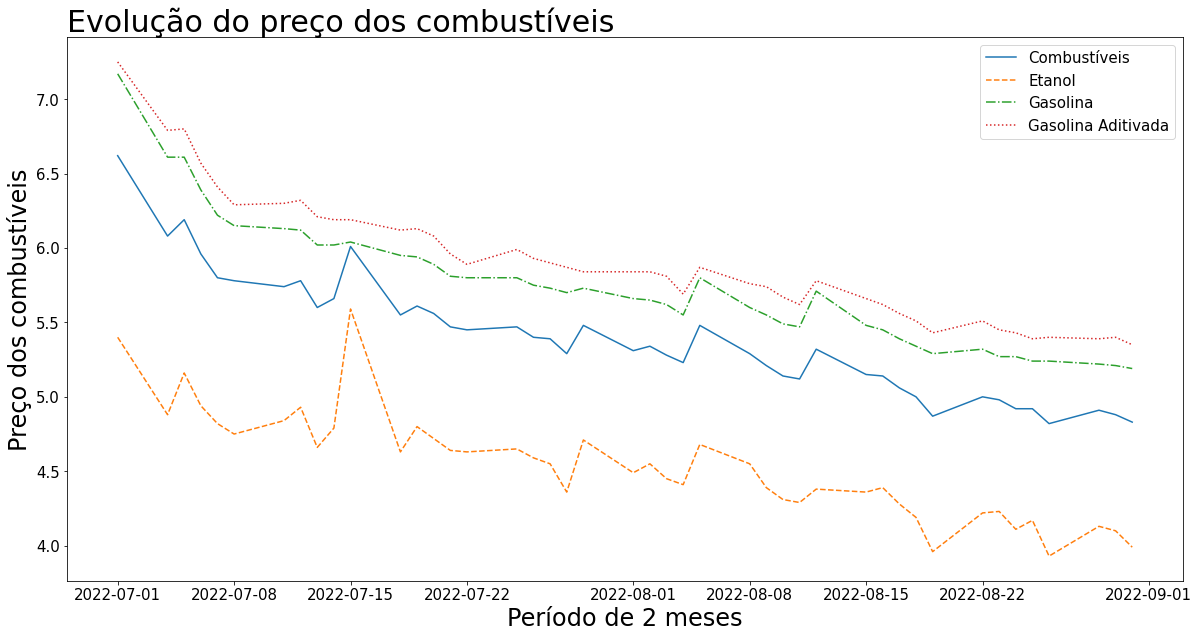

In [24]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.plot(venda_por_data['data_da_coleta'], venda_por_data['valor_de_venda'], label='Combustíveis') 
plt.plot(venda_por_data_etanol['data_da_coleta'], venda_por_data_etanol['valor_de_venda'], label='Etanol', linestyle="--")
plt.plot(venda_por_data_gasolina['data_da_coleta'], venda_por_data_gasolina['valor_de_venda'], label='Gasolina', linestyle="-.")
plt.plot(venda_por_data_gasolina_aditivada['data_da_coleta'], venda_por_data_gasolina_aditivada['valor_de_venda'], label='Gasolina Aditivada', linestyle=":")
plt.xlabel("Período de 2 meses", size=24) 
plt.ylabel("Preço dos combustíveis", size=24)  
plt.title("Evolução do preço dos combustíveis",loc='left', size=30)  
plt.legend()
plt.show() 

**Em relação ao comportamento do preço dos combustíveis nesse período:**


* Como pode ser observado ao longo de 2 meses, considerando o preço dos 3 tipos de combustíveis em todo o Brasil (Gasolina aditivada, gasolina e etanol), obtivemos uma queda quase linear de 27% desde o primeiro dia até o ultimo dia, caindo de <font size="5" color='red'>6.62</font> até <font size="5" color='green'>4.83</font> (valor em R$);

* Vale ser apontado também, que curiosamente, a média do primeiro dia (2022-07-01) é também o valor mais alto do combustível nesse período, enquanto o valor do ultimo dia (2022-08-31) é o segundo valor mais baixo, estando apenas 2 centavos acima do fundo;

* De acordo com o gráfico e com o que foi análisado, é possível concordar que o preço dos combustíveis estão em uma grande tendência de queda;

### **2. Qual o preço médio da gasolina e do etanol nesses 2 meses?**



Podemos calcular o preço médio de cada combustível facilmente utilizando o ".loc[ ]" para filtrar o produto (combustível específico) e o .mean() para calcular a média;

* preço médio da gasolina nos dois meses:

In [25]:
media_gasolina = formatar(dados.loc[dados['produto'] == 'GASOLINA']['valor_de_venda'].mean())
media_gasolina

5.71

* preço médio do etanol nos dois meses:

In [26]:
media_etanol = formatar(dados.loc[dados['produto'] == 'ETANOL']['valor_de_venda'].mean())
media_etanol

4.51

**Média da gasolina: 5.71**

**Média do etanol: 4.51**

Podemos conferir que na média, o etanol tende a ser mais barato que a gasolina;

### **3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**


* Gasolina:

Podemos verificar os estados com maior preço médio de cada tipo de combustível filtrando no dataframe por tipo de combustível e agrupando por estado, calculando a média, por fim basta retirar os 5 maiores valores:

In [27]:
gasolina_df = dados.loc[dados['produto'] == 'GASOLINA']
gasolina_df.groupby(['estado_sigla'])['valor_de_venda'].mean().apply(formatar).nlargest(5)

estado_sigla
AC    6.21
AM    6.19
PI    6.08
TO    6.05
BA    6.03
Name: valor_de_venda, dtype: float64

Dente os estados com preço de gasolina mais cara, temos:

**1. Acre**

**2. Amazonas**

**3. Piaui**

**4. Tocantins**

**5. Bahia**


Como podemos ver, dos 5 estados com preço de gasolina mais elevado, 3 são do Norte (Acre, Amazonas e Tocantins) 

e 2 são do Nordeste (Piaui e Bahia);

* Etanol:

In [28]:
etanol_df = dados.loc[dados['produto'] == 'ETANOL']
etanol_df.groupby(['estado_sigla'])['valor_de_venda'].mean().apply(formatar).nlargest(5)

estado_sigla
AP    5.90
RS    5.66
PA    5.62
RO    5.60
RR    5.57
Name: valor_de_venda, dtype: float64

Dente os estados com preço do etanol mais caro, temos:

**1. Amapá**

**2. Rio Grande do Sul**

**3. Pará**

**4. Rondônia**

**5. Roraima**

Como podemos ver, dos 5 estados com preço de etanol mais elevado, 1 é do Sudeste (Amapá), 1 é do sul (Rio Grande do Sul) e 3 são do Norte (Pará, Rondônia e Roraima);


 <font size="4">  No geral, o Norte é a região com os preços de combustíveis mais elevados;

### **4. Qual o preço médio da gasolina e do etanol por estado?**

Para conseguir esse resultado, basta utilizar os dataframes que criamos individualmente para cada tipo de combustível e agrupar por estado com a média:

* Gasolina: 

In [29]:
estados_gasolina = gasolina_df.groupby(['estado_sigla']).mean()
estados_gasolina['valor_de_venda'] = estados_gasolina['valor_de_venda'].apply(formatar)
estados_gasolina.head()

,valor_de_venda
estado_sigla,
AC,6.21
AL,5.94
AM,6.19
AP,5.11
BA,6.03


* Etanol:

In [30]:
estados_etanol = etanol_df.groupby(['estado_sigla']).mean()
estados_etanol['valor_de_venda'] = estados_etanol['valor_de_venda'].apply(formatar)
estados_etanol.head()

,valor_de_venda
estado_sigla,
AC,5.38
AL,5.24
AM,4.95
AP,5.90
BA,5.07


Vamos juntar os dois em um dataframe para facilitar a visualização em um gráfico:

In [31]:
estados_gasolina_etanol = pd.merge(estados_gasolina, estados_etanol, left_index=True, right_index=True)
estados_gasolina_etanol.rename(columns = {'valor_de_venda_x': 'media_gasolina', 'valor_de_venda_y': 'media_etanol'}, inplace = True)
estados_gasolina_etanol

,media_gasolina,media_etanol
estado_sigla,,
AC,6.21,5.38
AL,5.94,5.24
AM,6.19,4.95
AP,5.11,5.90
BA,6.03,5.07
CE,5.96,5.48
DF,5.60,4.75
ES,5.80,4.96
GO,5.52,4.06


<AxesSubplot:xlabel='estado_sigla'>

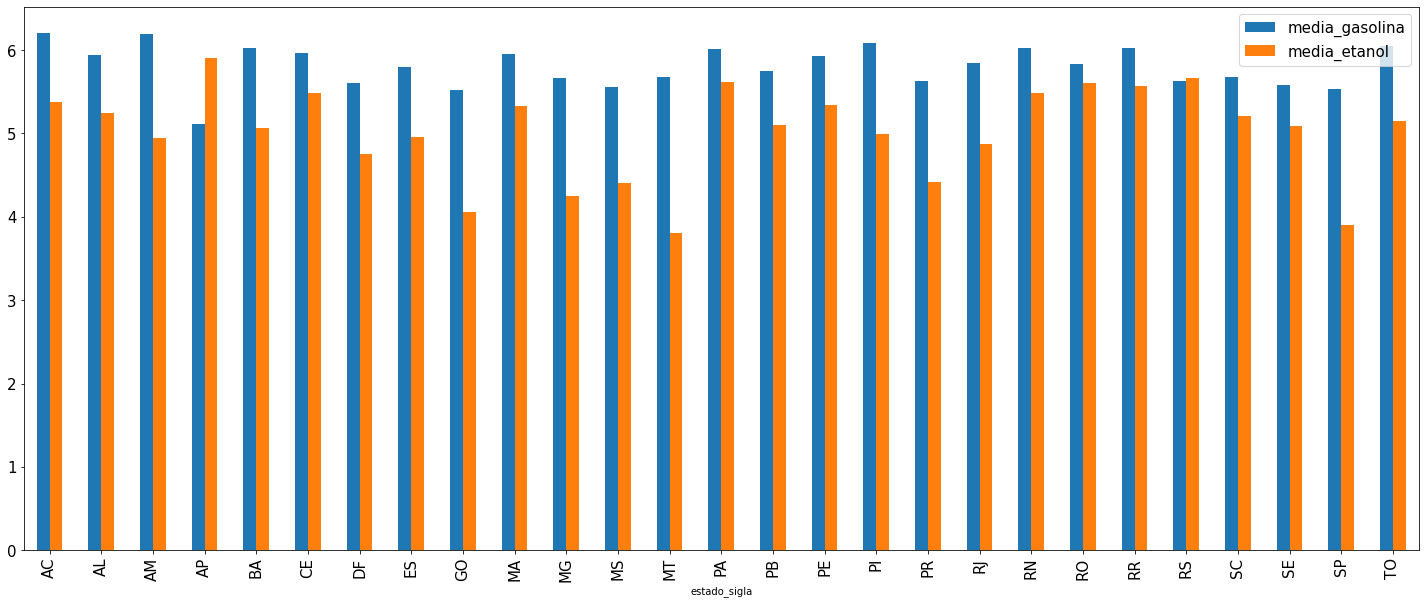

In [32]:
estados_gasolina_etanol.plot(kind = 'bar', figsize =(25,10))

 <font size="4"> Observando o gráfico, é possível concluir que no geral, em quase todos os estados do Brasil, a média do preço da gasolina tende a ser maior que a média do preço do etanol; (em 92,5% dos estados o preço da gasolina é superior ao preço do etanol, em apenas 7,5% dos estados o etanol é mais caro);

### **5. Qual o município que possui o menor preço para a gasolina e para o etanol?**

Para responder essa pergunta, utilizaremos os dataframes que possuem os valores individualmente da gasolina (gasolina_df) e do etanol (etanol_df) que foram montados anteriormente e filtraremos pelo valor mínimo.

In [33]:
gasolina_df.loc[gasolina_df['valor_de_venda'] == gasolina_df['valor_de_venda'].min()]

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
115938,S,RS,PASSO FUNDO,POSTO DE COMBUSTIVEIS BROCK E CIFRA LTDA,07.608.132/0001-40,AVENIDA BRASIL LESTE,85,CENTRO,99050-000,GASOLINA,2022-08-29,4.13,R$ / litro,IPIRANGA


In [34]:
etanol_df.loc[etanol_df['valor_de_venda'] == etanol_df['valor_de_venda'].min()]

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
125423,SE,SP,PRESIDENTE PRUDENTE,AUTO POSTO PRUDENTINO LTDA,52.531.860/0001-55,AVENIDA BRASIL,3040,VILA FORMOSA,19013-002,ETANOL,2022-08-31,2.89,R$ / litro,BRANCA


 <font size="4"> **Município com menor preço para gasolina:** Passo Fundo

  <font size="4"> **Município com menor preço etanol:** Presidente Prudente

### **6. Qual o município que possui o maior preço para a gasolina e para o etanol?**

Da mesma forma que na pergunta anterior, utilizaremos os dataframes (gasolina_df e etanol_df), mas agora, filtramos pelo maior valor:

In [35]:
gasolina_df.loc[gasolina_df['valor_de_venda'] == gasolina_df['valor_de_venda'].max()]

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
88341,N,TO,GURUPI,MUTUQUINHA AUTO POSTO LTDA,05.199.434/0001-86,RUA 12,25,JARDIM ELDORADO,77403-320,GASOLINA,2022-08-15,8.75,R$ / litro,BRANCA


In [36]:
etanol_df.loc[etanol_df['valor_de_venda'] == etanol_df['valor_de_venda'].max()]

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
9260,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,CENTRO,96415-100,ETANOL,2022-07-06,7.89,R$ / litro,IPIRANGA
26839,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,CENTRO,96415-100,ETANOL,2022-07-14,7.89,R$ / litro,IPIRANGA
37427,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,CENTRO,96415-100,ETANOL,2022-07-20,7.89,R$ / litro,IPIRANGA


 <font size="4"> **Município com maior preço para gasolina:** Gurupi

  <font size="4"> **Município com maior preço para etanol:** Bage

### **7. Qual a região que possui o maior valor médio da gasolina?**

Primeiro, alteramos o nome das regiões para melhor visualização das queries:

In [37]:
dados.regiao_sigla= dados.regiao_sigla.map({'CO':'CO: Centro-Oeste', 'SE': 'SE: Sudeste', 'S':'S: Sul', 'NE': 'NE: Nordeste', 'N': 'N: Norte'})
dados.regiao_sigla

0              SE: Sudeste
1              SE: Sudeste
2              SE: Sudeste
3              SE: Sudeste
4         CO: Centro-Oeste
                ...       
127171    CO: Centro-Oeste
127172    CO: Centro-Oeste
127173    CO: Centro-Oeste
127174         SE: Sudeste
127175         SE: Sudeste
Name: regiao_sigla, Length: 127176, dtype: object

Agora, filtramos o produto pela 'gasolina', agrupando pela região e adicionando a média do valor de venda:

In [38]:
regiao_maior_med_gas = dados[dados['produto']=='GASOLINA'].groupby(['regiao_sigla', 'produto']).aggregate( {"valor_de_venda":"mean"}).round(3).sort_values('valor_de_venda', ascending=False)
regiao_maior_med_gas.style.background_gradient(cmap='Oranges')

,,valor_de_venda
regiao_sigla,produto,
N: Norte,GASOLINA,5.972000
NE: Nordeste,GASOLINA,5.956000
S: Sul,GASOLINA,5.641000
SE: Sudeste,GASOLINA,5.616000
CO: Centro-Oeste,GASOLINA,5.582000


In [39]:
regiao_maior_med_gas.nlargest(1, columns = 'valor_de_venda')

,,valor_de_venda
regiao_sigla,produto,
N: Norte,GASOLINA,5.972


 <font size="4"> Corroborando o resultado que tivemos na pergunta 2, a região que possui o maior valor médio da gasolina é o Norte, seguido do Nordeste com um valor consideravelmente semelhante.

 1. **Norte** - 5.97
 2. **Nordeste** - 5.95

### **8. Qual a região que possui o menor valor médio do etanol?**

Da mesma forma que na questão anterior, filtramos pelo produto 'Etanol', agrupando pela região e adicionando a média do valor de venda:

In [40]:
regiao_menor_med_etanol = dados[dados['produto']=='ETANOL'].groupby(['regiao_sigla', 'produto']).aggregate( {"valor_de_venda":"mean"}).round(3).sort_values('valor_de_venda')
regiao_menor_med_etanol.style.background_gradient(cmap='BuPu')

,,valor_de_venda
regiao_sigla,produto,
CO: Centro-Oeste,ETANOL,4.107000
SE: Sudeste,ETANOL,4.150000
S: Sul,ETANOL,4.842000
NE: Nordeste,ETANOL,5.246000
N: Norte,ETANOL,5.341000


In [41]:
regiao_menor_med_etanol.nsmallest(1, columns = 'valor_de_venda')

,,valor_de_venda
regiao_sigla,produto,
CO: Centro-Oeste,ETANOL,4.107


 <font size="4"> A região que possui o menor valor médio do etanol é o Centro-Oeste, seguido do Sudeste com um valor consideravelmente semelhante.

 1. **Centro-Oeste** - 4.10
 2. **Nordeste** - 4.15

In [42]:
vl_medio_regiao = dados.groupby(['regiao_sigla', 'produto'])['valor_de_venda'].mean().reset_index()

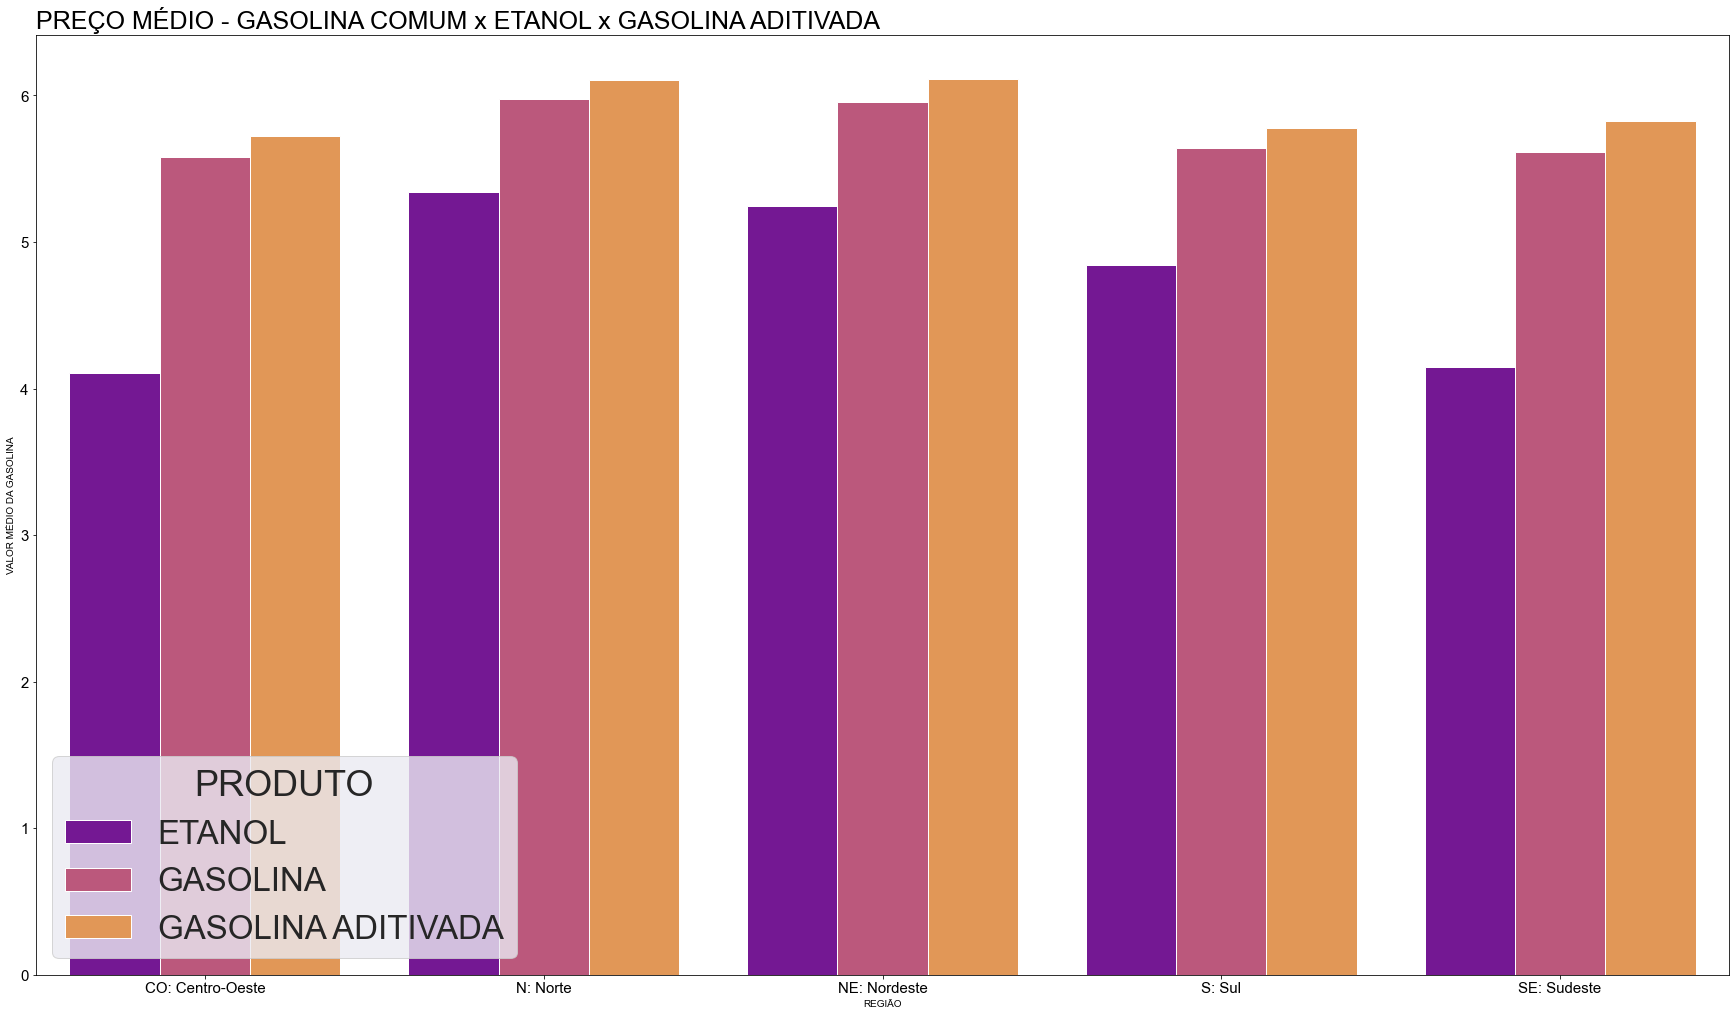

In [43]:
grafico_val_med_reg = plt.figure(figsize=(25,15))
plt.title('PREÇO MÉDIO - GASOLINA COMUM x ETANOL x GASOLINA ADITIVADA', loc='left', fontsize=25)
sns.set(font_scale=3)
sns.barplot(y='valor_de_venda', x='regiao_sigla', hue='produto',  data = vl_medio_regiao, palette='plasma');
plt.ylabel('VALOR MÉDIO DA GASOLINA')
plt.xlabel('REGIÃO')
plt.legend(title="PRODUTO", loc='lower left')

plt.tight_layout()

<font size="4">Por meio do gráfico, podemos verificar os resultado que já obtivemos:

* <font size="4"> O Centro-Oeste é a região com menor valor médio do etanol;
* <font size="4"> O Norte é a região com maior valor médio da Gasolina (e também do etanol), com o Nordeste com um valor bem semelhante;

### **9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

Vamos analisar a variação do valor de cada produto de cada região individualmente:

In [44]:
dados.groupby(['regiao_sigla', 'produto', pd.Grouper(key='data_da_coleta', freq='M')]).agg({'valor_de_venda' : 'mean'})

valor_de_venda
regiao_sigla     produto            data_da_coleta                
CO: Centro-Oeste ETANOL             2022-07-31            4.324710
                                    2022-08-31            3.927304
                 GASOLINA           2022-07-31            5.894329
                                    2022-08-31            5.321278
                 GASOLINA ADITIVADA 2022-07-31            6.034480
                                    2022-08-31            5.460218
N: Norte         ETANOL             2022-07-31            5.637043
                                    2022-08-31            5.098576
                 GASOLINA           2022-07-31            6.322346
                                    2022-08-31            5.686267
                 GASOLINA ADITIVADA 2022-07-31            6.457643
                                    2022-08-31            5.817659
NE: Nordeste     ETANOL             2022-07-31            5.605162
                                    2022-08-31            4.951936
                 GASOLINA           2022-07-31            6.443064
                                    2022-08-31            5.553415
                 GASOLINA ADITIVADA 2022-07-31            6.600561
                                    2022-08-31            5.705540
S: Sul           ETANOL             2022-07-31            5.104525
                                    2022-08-31            4.622566
                 GASOLINA           2022-07-31            5.939016
                                    2022-08-31            5.388389
                 GASOLINA ADITIVADA 2022-07-31            6.079456
                                    2022-08-31            5.520075
SE: Sudeste      ETANOL             2022-07-31            4.364011
                                    2022-08-31            3.973156
                 GASOLINA           2022-07-31            5.926829
                                    2022-08-31            5.358708
                 GASOLINA ADITIVADA 2022-07-31            6.140690
                                    2022-08-31            5.568004

<font size="4"> Reduções de preço:

**CO - Centro - Oeste**
* Etanol - redução de 10%
* Gasolina - redução de 10%
* Gasolina Aditivada - redução de 10%

**N - Norte**
* Etanol - redução de 10%
* Gasolina - redução de 10%
* Gasolina aditivada - redução de 10%

**NE - Nordeste**
* Etanol - redução de 12%
* Gasolina - redução de 14%
* Gasolina Aditivada - redução de 14%

**S - Sul**
* Etanol - redução de 10%
* Gasolina - redução de 10%
* Gasolina Aditivada - redução de 10%

**SE - Sudeste**
* Etanol - redução de 9%
* Gasolina - redução de 10%
* Aditivada - redução de 9%
</font> 

 <font size="4"> Por meio dessa análise, podemos ver que no Nordeste foi onde o preço da gasolina mais foi reduzido, mas fora isso, as demais regiões tiveram redução semelhante em porcentagem (%).
 É possível também fortificar algumas conclusões já tiradas antes, como os preços mais elevados no Norte e menor preço no Sudeste.
 </font> 

### **10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

Assim como na questão anterior, vamos verificar as bandeiras e o preço que elas oferecem cada produto:

In [45]:
dados.groupby(['bandeira', 'produto', pd.Grouper(key='data_da_coleta', freq='M')]).agg({'valor_de_venda' : 'mean'})

valor_de_venda
bandeira produto            data_da_coleta                
ALESAT   ETANOL             2022-07-31            4.956206
                            2022-08-31            4.409747
         GASOLINA           2022-07-31            6.192303
                            2022-08-31            5.467695
         GASOLINA ADITIVADA 2022-07-31            6.299700
...                                                    ...
WATT     ETANOL             2022-08-31            3.983333
         GASOLINA           2022-07-31            6.400000
                            2022-08-31            5.716667
         GASOLINA ADITIVADA 2022-07-31            7.630000
                            2022-08-31            6.290000

[283 rows x 1 columns]

Por possuir muitas informações, vamos colocar tirar uma média geral dos combustíveis e colocar em um gráfico para facilitar a visualização

In [46]:
bandeiras = dados.groupby(['bandeira']).aggregate( {"valor_de_venda":"mean"}).round(3).sort_values('valor_de_venda', ascending=False)
bandeiras.style.background_gradient(cmap='Oranges')

,valor_de_venda
bandeira,
PETRONAC,6.190000
EQUADOR,5.935000
SP,5.934000
REJAILE,5.912000
FAN,5.891000
PETROBAHIA,5.879000
ESTRADA,5.877000
SABBÁ,5.833000
TEMAPE,5.823000


bandeiras que oferecem maior valor por produto: 
 * PETRONAC 
 * EQUADOR 
 * SP 

bandeiras que oferecem menor valor por produto: 
* TORRÃO
* ROYAL FIC
* RUFF C.J

Fazendo uma breve pesquisa, descobrimos que as três bandeiras que oferecem maior valor por produto são localizadas principalmente no Norte e no Nordeste (Petronac  e SP - Nordeste, Equador - Norte) enquanto todas as três bandeiras que oferecem menor valor por produto são localizadas em São Paulo (Sudeste).

### **11. Extra - Variação do preço medio da gasolina**

Veriaficando a existencia de uma variação, no valor medio do preço da gasolina no período. Como o valor varia na serie tempora ?

In [102]:
dados_gasolina = dados.query("produto == 'GASOLINA'")
dados_valor_medio_gasolina = dados_gasolina.groupby("data_da_coleta").mean()
dados_valor_medio_gasolina.head()

,valor_de_venda
data_da_coleta,
2022-07-01,7.173200
2022-07-04,6.612834
2022-07-05,6.611722
2022-07-06,6.392098
2022-07-07,6.222464


Vamos usar a função diff para calcular a diferença entre os valores de vendas, ou seja o preço, assim vamos saber como é a diferença do preço entre as coletas.
Aqual chamaremos de Variacao

In [103]:
dados_valor_medio_gasolina["variacao"] = dados_valor_medio_gasolina['valor_de_venda'].diff()
dados_valor_medio_gasolina.head()

,valor_de_venda,variacao
data_da_coleta,,
2022-07-01,7.173200,NaN
2022-07-04,6.612834,-0.560366
2022-07-05,6.611722,-0.001112
2022-07-06,6.392098,-0.219624
2022-07-07,6.222464,-0.169634


In [104]:
def plotagem(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset, sizes=50)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=10)
  ax.tick_params(labelsize=12)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

 Vamos criar um plotagem para facilitar a visualização o dos dados.

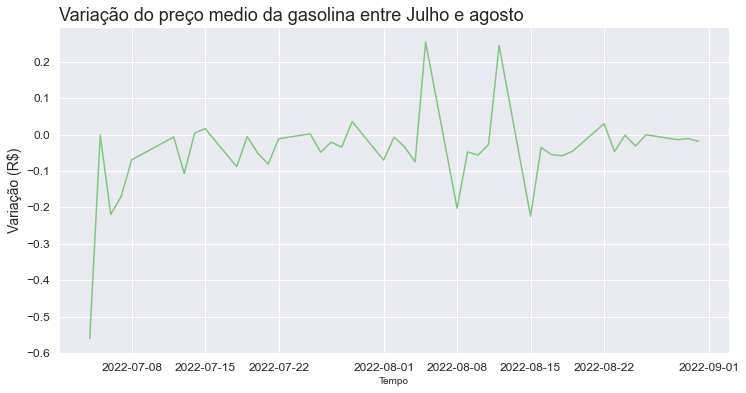

In [105]:
plotagem('Variação do preço medio da gasolina entre Julho e agosto',
         'Tempo',
         'Variação (R$)',
         'data_da_coleta',
         dados_valor_medio_gasolina.variacao[1:],
         dados_valor_medio_gasolina)

No grafico podemos ver uma queda nos preços na primeira semana e mesmo com alguns momentos de alumento de preço, temos mais momentos de queda.

### **12. Extra - Variação do preço medio do Etanol**

Agora vamos ver o valor medio do preço da etanol no período e se varia diferente da gasolina. Como o valor varia na serie tempora ?

In [106]:
dados_etanol = dados.query("produto == 'ETANOL'")
dados_valor_medio_etanol = dados_etanol.groupby("data_da_coleta").mean()
dados_valor_medio_etanol.head()

,valor_de_venda
data_da_coleta,
2022-07-01,5.395652
2022-07-04,4.879523
2022-07-05,5.158455
2022-07-06,4.944885
2022-07-07,4.820669


In [107]:

dados_valor_medio_etanol["variacao"] = dados_valor_medio_etanol['valor_de_venda'].diff()
dados_valor_medio_etanol.head()

,valor_de_venda,variacao
data_da_coleta,,
2022-07-01,5.395652,NaN
2022-07-04,4.879523,-0.516129
2022-07-05,5.158455,0.278932
2022-07-06,4.944885,-0.213570
2022-07-07,4.820669,-0.124216


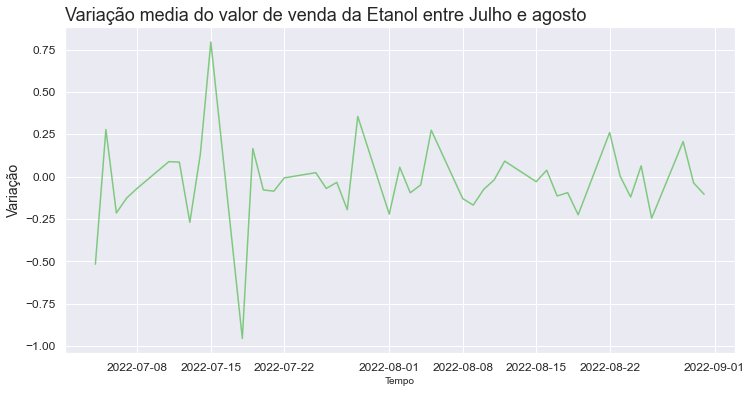

In [108]:
plotagem('Variação media do valor de venda da Etanol entre Julho e agosto',
         'Tempo',
         'Variação',
         'data_da_coleta',
         'variacao',
         dados_valor_medio_etanol)

Existem bem mais variação do que a gasolina, e temos quedas mais acentuadas de valor e assim como aumentos de valos.